# Librerías y lectura

Importación de librerías

In [93]:
import pandas as pd
import numpy as np

In [94]:
#pip freeze > requirements.txt

Lectura del CSV y primer vistazo

In [95]:
df_original = pd.read_csv('Anuncios_venta_dataset_final.csv', sep=';')

# Eliminamos los espacios en blanco al principio y al final de cada celda
df_original = df_original.applymap(lambda x: x.strip() if isinstance(x, str) else x)


print('El tamaño del dataframe es:', df_original.shape)
df_original.head(5)

El tamaño del dataframe es: (2961, 24)


,Referencia,Tipo_vivienda,Dirección,Barrio,Distrito,Población,Superficie construida,Superficie útil,Superficie solar,Habitaciones,...,Gastos de comunidad,Precio,Precio/m²,PMZona,PMm²Zona,RMP,RMH,Descripción,Url_foto,Url_vivienda
0,IF7146-P1739,Piso,"Calle de Goya, 17",Golf-El Carralero,Majadahonda,Majadahonda,139.0,NaN,0.0,3,...,NaN,595000.0,4280.575540,806473.17,3809.79,21248.0,66390.0,¡Increíble oportunidad de adquirir un piso en ...,https://fotos.imghs.net/apps/1018/424/1018_102...,https://www.pisos.com/comprar/piso-golf_el_car...
1,2805-002322,Piso,Calle del Terral,Prado de Somosaguas,Pozuelo de Alarcón,Pozuelo de Alarcón,125.0,125.0,0.0,2,...,Incluídos,540000.0,4320.000000,1028586.40,4151.27,27167.0,86403.0,INMOBARALIA VENDE PISO EN RENTABILIDAD (Se ven...,https://fotos.imghs.net/apps/2805/30074966438....,https://www.pisos.com/comprar/piso-prado_de_so...
2,4514156-CONCEPCION,Piso,"Calle de la Virgen de Sonsoles, 1",Concepción,Ciudad Lineal,Madrid Capital,95.0,85.0,0.0,3,...,Entre 80 y 100 €,330000.0,3473.684211,404569.14,4016.05,16890.0,41311.0,"Bonito piso muy luminoso y soleado, exterior c...",https://fotos.imghs.net/apps/514156/3418914857...,https://www.pisos.com/comprar/piso-concepcion-...
3,4501235-120920037,Casa unifamiliar,Lozoyuela,Lozoyuela,Lozoyuela-Navas-Sieteiglesias,Lozoyuela-Navas-Sieteiglesias,315.0,125.0,976.0,4,...,NaN,263000.0,834.920635,246857.14,1397.97,11600.0,29083.0,BREM GLOBAL INMOBILIARIA presenta esta LUMINOS...,https://fotos.imghs.net/apps/501235/3583530024...,https://www.pisos.com/comprar/casa_unifamiliar...
4,GM32-191775,Piso,Monterrozas-El Cantizal,Monte Rozas-La Chopera,Las Rozas de Madrid,Las Rozas de Madrid,89.0,NaN,0.0,2,...,NaN,378000.0,4247.191011,734591.73,3773.82,21254.0,65428.0,GILMAR Las Rozas vende piso en el Cantizal de ...,https://fotos.imghs.net/apps/1021/775/1021_191...,https://www.pisos.com/comprar/piso-monte_rozas...


In [96]:
dfdistrito = df_original.groupby('Distrito').first()[['RMH', 'PMm²Zona', 'PMZona']]
dfdistrito.to_csv('Distrito_medidas.csv', sep=';')

In [97]:
pd.DataFrame(df_original['Tipo_vivienda'].unique(), columns=['TipoVivienda']).to_csv('Tipo_vivienda.csv', sep=';')

In [98]:
df_original.dtypes

Referencia                object
Tipo_vivienda             object
Dirección                 object
Barrio                    object
Distrito                  object
Población                 object
Superficie construida    float64
Superficie útil          float64
Superficie solar         float64
Habitaciones               int64
Baños                      int64
Planta                    object
Antigüedad                object
Conservación              object
Gastos de comunidad       object
Precio                   float64
Precio/m²                float64
PMZona                   float64
PMm²Zona                 float64
RMP                      float64
RMH                      float64
Descripción               object
Url_foto                  object
Url_vivienda              object
dtype: object

In [99]:
df_original.columns #Para seleccionar las columnas que se van a utilizar

Index(['Referencia', 'Tipo_vivienda', 'Dirección', 'Barrio', 'Distrito',
       'Población', 'Superficie construida', 'Superficie útil',
       'Superficie solar', 'Habitaciones', 'Baños', 'Planta', 'Antigüedad',
       'Conservación', 'Gastos de comunidad', 'Precio', 'Precio/m²', 'PMZona',
       'PMm²Zona', 'RMP', 'RMH', 'Descripción', 'Url_foto', 'Url_vivienda'],
      dtype='object')

In [100]:
columnas_a_usar = [
    'Tipo_vivienda', 'Superficie construida', 'Superficie útil',
       'Superficie solar', 'Habitaciones', 'Baños', 'Planta', 'Antigüedad',
       'Conservación', 'Gastos de comunidad', 'Precio', 'PMZona',
       'PMm²Zona', 'RMP', 'RMH'
]

df = df_original[columnas_a_usar]
df.dtypes

Tipo_vivienda             object
Superficie construida    float64
Superficie útil          float64
Superficie solar         float64
Habitaciones               int64
Baños                      int64
Planta                    object
Antigüedad                object
Conservación              object
Gastos de comunidad       object
Precio                   float64
PMZona                   float64
PMm²Zona                 float64
RMP                      float64
RMH                      float64
dtype: object

# Tratamiento de columnas: nulos y dtypes

In [101]:
#Visualizamos los nulos
df.isna().sum() 

Tipo_vivienda               0
Superficie construida       0
Superficie útil          1648
Superficie solar            0
Habitaciones                0
Baños                       0
Planta                    550
Antigüedad               2230
Conservación             1042
Gastos de comunidad      2253
Precio                      0
PMZona                      0
PMm²Zona                    0
RMP                         1
RMH                         1
dtype: int64

Columna RMP/RMH

In [102]:
df[df['RMP'].isna()]

,Tipo_vivienda,Superficie construida,Superficie útil,Superficie solar,Habitaciones,Baños,Planta,Antigüedad,Conservación,Gastos de comunidad,Precio,PMZona,PMm²Zona,RMP,RMH
123,Piso,120.0,102.0,0.0,4,2,2,NaN,En buen estado,NaN,289000.0,289000.0,2408.33,NaN,NaN


In [103]:
df = df[~df['RMP'].isna()] #Son 2 valores, por lo que no representan un problema y se eliminan

Columna Planta

In [104]:
df['Planta'].unique()

array(['2', '3', '1', '0', nan, '4', '8', 'Sótano', '5', 'Bajo', '10',
       'Principal', '11', '9', '7', '6', 'Entresuelo', 'Semisótano', '14',
       '12', '13'], dtype=object)

In [105]:
df['Planta'] = df['Planta'].str.strip()
df['Planta'] = df['Planta'].replace({'Sótano': -1, 'Semisótano': -0.5, 'Bajo': 0, 'Principal': 0.5, 'Entresuelo': 0})
df['Planta'].unique()

antes = df['Planta'].dropna().astype(float)

Imputamos la mediana a los pisos que salen como nulos

In [106]:
median = (pd.to_numeric(df[~df['Planta'].isna()]['Planta']).median())
df['Planta'].fillna(median, inplace=True)

df['Planta'] = pd.to_numeric(df['Planta'], errors='coerce')

df['Planta'].dtypes

dtype('float64')

In [107]:
median

1.0

1.0


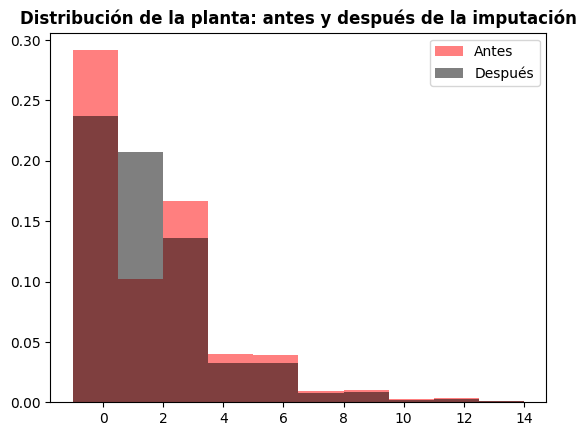

In [108]:
import matplotlib.pyplot as plt

print(median)
despues=df['Planta']
plt.hist(antes, alpha=0.5, label='Antes', color='red', density=True)
plt.hist(despues, alpha=0.5, label='Después', color='black', density=True)

plt.title('Distribución de la planta: antes y después de la imputación', fontweight='bold')

plt.legend(loc='upper right')
plt.show()

In [109]:
df.isna().sum()

Tipo_vivienda               0
Superficie construida       0
Superficie útil          1648
Superficie solar            0
Habitaciones                0
Baños                       0
Planta                      0
Antigüedad               2229
Conservación             1042
Gastos de comunidad      2252
Precio                      0
PMZona                      0
PMm²Zona                    0
RMP                         0
RMH                         0
dtype: int64

Eliminamos las columnas de "Antigüedad" y "Gastos de comunidad" porque contienen demasiados nulos (2229 y 2252).

La columna "Superficie útil" también contiene el 50% de los nulos, por lo que también la eliminamos.

Procedemos a probar 2 dataframes: uno con los datos de conservación y otro sin ellos.

In [110]:
columnas_a_usar = [
    'Tipo_vivienda',
    'Superficie construida',
    'Superficie solar',
    'Habitaciones',
    'Baños',
    'Planta',
    'Conservación',
    'Precio',
    'PMZona',
    'PMm²Zona',
    'RMP',
    'RMH'
 ]

In [111]:
df = df[columnas_a_usar]

#Eliminamos los nulos de conservación.
df = df[~df['Conservación'].isna()]
print(f'Dimensiones del df: {df.shape}')
df.dtypes

Dimensiones del df: (1918, 12)


Tipo_vivienda             object
Superficie construida    float64
Superficie solar         float64
Habitaciones               int64
Baños                      int64
Planta                   float64
Conservación              object
Precio                   float64
PMZona                   float64
PMm²Zona                 float64
RMP                      float64
RMH                      float64
dtype: object

In [112]:
df['Conservación'] = df['Conservación'].str.strip()

Superficie solar outliers

In [113]:
# Filtramos la columna de superficie solar ya que contiene outliers por encima (8k m2)

print(f'Antes: {df.shape}')

# Calculate the upper percentile
upper_percentile = df['Superficie solar'].quantile(0.8)

# Filter the dataframe to remove outliers
df = df[df['Superficie solar'] <= upper_percentile]

print(f'Después: {df.shape}')

Antes: (1918, 12)
Después: (1678, 12)


In [114]:
# Tras comprobar nuestro modelo, hemos decidido eliminar la columna de superficie solar ya que en los coeficientes nos aporta un valor nulo (0)
df = df.drop(columns=['Superficie solar'])

Outliers de precio

In [115]:
df['Precio'].describe()

count    1.678000e+03
mean     5.756443e+05
std      7.664929e+05
min      6.770000e+04
25%      2.190000e+05
50%      3.600000e+05
75%      5.996750e+05
max      1.120000e+07
Name: Precio, dtype: float64

In [116]:
# Filtramos la columna de precio para eliminar los outliers y nos quedamos con los percentiles entre 0.05 y 0.95

print(f'Antes: {df.shape}')

# Calculate the lower and upper percentiles
upper_percentile = df['Precio'].quantile(0.95)

# Filter the dataframe to remove outliers
df = df[(df['Precio'] <= upper_percentile)]

print(f'Después: {df.shape}')


df['Precio'].describe()


Antes: (1678, 11)
Después: (1596, 11)


count    1.596000e+03
mean     4.357894e+05
std      3.097142e+05
min      6.770000e+04
25%      2.139848e+05
50%      3.394500e+05
75%      5.482000e+05
max      1.650000e+06
Name: Precio, dtype: float64

In [117]:
df.to_csv('Anuncio_Venta_ML_Limpio.csv', index=False, sep=';')